# Introduction to Regression with Neural Networks in TensorFlow

Predicting a numerical variable based on some other combination of vairables.

In [1]:
# conda install -c anaconda graphviz

In [2]:
# pip install pydot

In [3]:
# pip install tensorflow

In [4]:
# pip install pandas

In [5]:
# pip install matplotlib

In [6]:
import tensorflow as tf
print(tf.__version__)

2.11.0


In [7]:
## Create data to view and fit
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

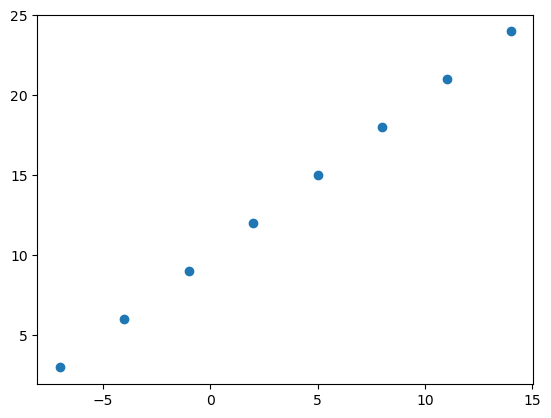

In [8]:
# create features
X = np.array([-7., -4., -1., 2., 5., 8., 11., 14.])

# create labels
y = np.array([3., 6., 9., 12., 15., 18., 21., 24.])

#visualize
plt.scatter(X, y)

In [9]:
X + 10

array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])

In [10]:
# function we want our nn to learn
y == X + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

### input and output shapes

In [11]:
# Create a demo tensor for our housing price prediction problem

house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])

house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700])>)

In [12]:
X[0], y[0]

(-7.0, 3.0)

In [13]:
X[1], y[1]

(-4.0, 6.0)

In [14]:
input_shape = X.shape
output_shape = y.shape

input_shape, output_shape

((8,), (8,))

In [15]:
input_shape = X[0].shape
output_shape = y[0].shape

input_shape, output_shape

((), ())

In [16]:
X[0].ndim

0

In [17]:
X[0], y[0]

(-7.0, 3.0)

In [18]:
# Turn our numpy arrays into tensors

X = tf.constant(X)
y = tf.constant(y)

X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [19]:
input_shape = X[0].shape
output_shape = y[0].shape

input_shape, output_shape

(TensorShape([]), TensorShape([]))

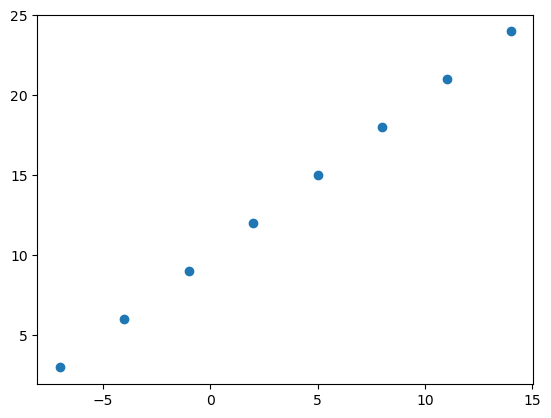

In [20]:
plt.scatter(X, y)

## Steps in modelling with TensorFlow

1. Creating a model - define the input and output layers, as weel as the hidden layers of a deep learning model
2. Compiling a model - define the loss function (in other words, the function which tells our model how wrong it is) and the optimizer (tells our model how to improve the patterns its learning) and evaluation metrics (what we can use to interpret the performance of our model)
3. Fitting a model - letting a model try to find patterns between X & y (features and labels)

In [21]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model using Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1) # , input_shape = (1,)
])

# 2. Compile the model
model.compile(loss = tf.keras.losses.mae, # mae -> mean absolute error
                optimizer = tf.keras.optimizers.SGD(),
                metrics = ["mae"]) # SGD -> stochastic gradient descent

# 3. Fit the model
model.fit(tf.expand_dims(X, axis = -1), y, epochs = 5)

Epoch 1/5
1/1 [==============================] - 1s 847ms/step - loss: 12.8216 - mae: 12.8216
Epoch 2/5
1/1 [==============================] - 0s 16ms/step - loss: 12.6891 - mae: 12.6891
Epoch 3/5
1/1 [==============================] - 0s 0s/step - loss: 12.5566 - mae: 12.5566
Epoch 4/5
1/1 [==============================] - 0s 0s/step - loss: 12.4241 - mae: 12.4241
Epoch 5/5
1/1 [==============================] - 0s 6ms/step - loss: 12.2916 - mae: 12.2916


In [22]:
# model = tf.keras.Sequential()
# model.add(tf.keras.layers.Dense(1))

In [23]:
# # Optionally, the first layer can receive an 'input_shape' argument:
# model = tf.keras.Sequential()
# model.add(tf.keras.layers.Dense(8, input_shape = (16,)))
# # After, we do automatic shape inference
# model.add(tf.keras.layers.Dense(4))

In [24]:
# Turn our NumPy arrays into tensors with dtype float32
X = tf.cast(tf.constant(X), dtype = tf.float32)
y = tf.cast(tf.constant(y), dtype = tf.float32)

X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [25]:
# Check out X and y
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [26]:
# try and make a prediction using our model
model.predict([17.])

1/1 [==============================] - 0s 173ms/step


array([[6.3199806]], dtype=float32)

In [27]:
# Another version of creating a model

# model = tf.keras.Sequential()
# model.add(tf.keras.layers.Dense(1))


## STEPS IN IMPROVING A MODEL

We can improve our model by altering the steps we took to create a model.

1. **Creating a model** - here, we might add more layers, increase the number of hidden units (neurons) within each of the hidden layers, change the activation function of each layer.
2. **Compiling a model** - here we might change the optimization function or perhaps the **learning rate** of the optimization function.
3. **Fitting a model** - here we might fit a model for more **epochs** (leave it training for longer) or on more data (give the model more examples to learn from)

In [28]:
# Let's rebuild our model

# 1. Create a model
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(1))

# 2. Compile a model
model.compile(loss = tf.keras.losses.mae, 
                optimizer = tf.keras.optimizers.SGD(),
                metrics = ["mae"])

# fit the model (this time we'll train for longer)
model.fit(tf.expand_dims(X, axis = -1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 549ms/step - loss: 8.4497 - mae: 8.4497
Epoch 2/100
1/1 [==============================] - 0s 16ms/step - loss: 8.3172 - mae: 8.3172
Epoch 3/100
1/1 [==============================] - 0s 16ms/step - loss: 8.1847 - mae: 8.1847
Epoch 4/100
1/1 [==============================] - 0s 16ms/step - loss: 8.0522 - mae: 8.0522
Epoch 5/100
1/1 [==============================] - 0s 16ms/step - loss: 7.9197 - mae: 7.9197
Epoch 6/100
1/1 [==============================] - 0s 16ms/step - loss: 7.7872 - mae: 7.7872
Epoch 7/100
1/1 [==============================] - 0s 22ms/step - loss: 7.6547 - mae: 7.6547
Epoch 8/100
1/1 [==============================] - 0s 16ms/step - loss: 7.5222 - mae: 7.5222
Epoch 9/100
1/1 [==============================] - 0s 16ms/step - loss: 7.4400 - mae: 7.4400
Epoch 10/100
1/1 [==============================] - 0s 16ms/step - loss: 7.4344 - mae: 7.4344
Epoch 11/100
1/1 [==============================] - 0s 16ms/step - l

1/1 [==============================] - 0s 19ms/step - loss: 6.9956 - mae: 6.9956
Epoch 89/100
1/1 [==============================] - 0s 13ms/step - loss: 6.9900 - mae: 6.9900
Epoch 90/100
1/1 [==============================] - 0s 16ms/step - loss: 6.9844 - mae: 6.9844
Epoch 91/100
1/1 [==============================] - 0s 16ms/step - loss: 6.9788 - mae: 6.9788
Epoch 92/100
1/1 [==============================] - 0s 16ms/step - loss: 6.9731 - mae: 6.9731
Epoch 93/100
1/1 [==============================] - 0s 16ms/step - loss: 6.9675 - mae: 6.9675
Epoch 94/100
1/1 [==============================] - 0s 16ms/step - loss: 6.9619 - mae: 6.9619
Epoch 95/100
1/1 [==============================] - 0s 7ms/step - loss: 6.9563 - mae: 6.9563
Epoch 96/100
1/1 [==============================] - 0s 16ms/step - loss: 6.9506 - mae: 6.9506
Epoch 97/100
1/1 [==============================] - 0s 16ms/step - loss: 6.9450 - mae: 6.9450
Epoch 98/100
1/1 [==============================] - 0s 16ms/step - loss: 6

In [29]:
model.predict([17.])

1/1 [==============================] - 0s 126ms/step


array([[30.060114]], dtype=float32)

In [30]:
# Remind ourselves of the data
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

## PART 3

In [31]:
# 1. Create a model (this time with an extra hidden layer with 100 hidden units)

model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(100, activation="relu"))
model.add(tf.keras.layers.Dense(1))

# 2. Compile the model
model.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.SGD(),
                metrics = ["mae"])

# 3. Fit the model

model.fit(tf.expand_dims(X, axis = -1), y, epochs = 100)

Epoch 1/100
1/1 [==============================] - 1s 675ms/step - loss: 13.2710 - mae: 13.2710
Epoch 2/100
1/1 [==============================] - 0s 20ms/step - loss: 12.6992 - mae: 12.6992
Epoch 3/100
1/1 [==============================] - 0s 12ms/step - loss: 12.1304 - mae: 12.1304
Epoch 4/100
1/1 [==============================] - 0s 0s/step - loss: 11.5693 - mae: 11.5693
Epoch 5/100
1/1 [==============================] - 0s 0s/step - loss: 10.9973 - mae: 10.9973
Epoch 6/100
1/1 [==============================] - 0s 16ms/step - loss: 10.4105 - mae: 10.4105
Epoch 7/100
1/1 [==============================] - 0s 16ms/step - loss: 9.7996 - mae: 9.7996
Epoch 8/100
1/1 [==============================] - 0s 16ms/step - loss: 9.1564 - mae: 9.1564
Epoch 9/100
1/1 [==============================] - 0s 0s/step - loss: 8.4921 - mae: 8.4921
Epoch 10/100
1/1 [==============================] - 0s 16ms/step - loss: 7.7892 - mae: 7.7892
Epoch 11/100
1/1 [==============================] - 0s 16ms/st

1/1 [==============================] - 0s 0s/step - loss: 3.6866 - mae: 3.6866
Epoch 89/100
1/1 [==============================] - 0s 0s/step - loss: 3.7535 - mae: 3.7535
Epoch 90/100
1/1 [==============================] - 0s 0s/step - loss: 3.6891 - mae: 3.6891
Epoch 91/100
1/1 [==============================] - 0s 0s/step - loss: 3.7363 - mae: 3.7363
Epoch 92/100
1/1 [==============================] - 0s 5ms/step - loss: 3.6967 - mae: 3.6967
Epoch 93/100
1/1 [==============================] - 0s 0s/step - loss: 3.7081 - mae: 3.7081
Epoch 94/100
1/1 [==============================] - 0s 0s/step - loss: 3.7046 - mae: 3.7046
Epoch 95/100
1/1 [==============================] - 0s 0s/step - loss: 3.6800 - mae: 3.6800
Epoch 96/100
1/1 [==============================] - 0s 0s/step - loss: 3.7125 - mae: 3.7125
Epoch 97/100
1/1 [==============================] - 0s 16ms/step - loss: 3.6603 - mae: 3.6603
Epoch 98/100
1/1 [==============================] - 0s 16ms/step - loss: 3.7295 - mae: 3.7

In [32]:
# Let's remind ourselves of the data
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [33]:
model.predict([17.])

1/1 [==============================] - 0s 126ms/step


array([[32.331104]], dtype=float32)

In [34]:
# 1. Create a model (this time with an extra hidden layer with 100 hidden units)

model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(50, activation="relu"))
model.add(tf.keras.layers.Dense(1))

# 2. Compile the model
model.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.SGD(),
                metrics = ["mae"])

# 3. Fit the model

model.fit(tf.expand_dims(X, axis = -1), y, epochs = 100)

Epoch 1/100
1/1 [==============================] - 1s 674ms/step - loss: 14.4000 - mae: 14.4000
Epoch 2/100
1/1 [==============================] - 0s 11ms/step - loss: 13.8423 - mae: 13.8423
Epoch 3/100
1/1 [==============================] - 0s 16ms/step - loss: 13.2929 - mae: 13.2929
Epoch 4/100
1/1 [==============================] - 0s 16ms/step - loss: 12.7465 - mae: 12.7465
Epoch 5/100
1/1 [==============================] - 0s 16ms/step - loss: 12.1976 - mae: 12.1976
Epoch 6/100
1/1 [==============================] - 0s 0s/step - loss: 11.6415 - mae: 11.6415
Epoch 7/100
1/1 [==============================] - 0s 12ms/step - loss: 11.0724 - mae: 11.0724
Epoch 8/100
1/1 [==============================] - 0s 16ms/step - loss: 10.4857 - mae: 10.4857
Epoch 9/100
1/1 [==============================] - 0s 16ms/step - loss: 9.8761 - mae: 9.8761
Epoch 10/100
1/1 [==============================] - 0s 16ms/step - loss: 9.2382 - mae: 9.2382
Epoch 11/100
1/1 [==============================] - 0s

1/1 [==============================] - 0s 0s/step - loss: 3.6903 - mae: 3.6903
Epoch 89/100
1/1 [==============================] - 0s 0s/step - loss: 3.7346 - mae: 3.7346
Epoch 90/100
1/1 [==============================] - 0s 16ms/step - loss: 3.6979 - mae: 3.6979
Epoch 91/100
1/1 [==============================] - 0s 11ms/step - loss: 3.7059 - mae: 3.7059
Epoch 92/100
1/1 [==============================] - 0s 16ms/step - loss: 3.7058 - mae: 3.7058
Epoch 93/100
1/1 [==============================] - 0s 16ms/step - loss: 3.6771 - mae: 3.6771
Epoch 94/100
1/1 [==============================] - 0s 16ms/step - loss: 3.7214 - mae: 3.7214
Epoch 95/100
1/1 [==============================] - 0s 16ms/step - loss: 3.6576 - mae: 3.6576
Epoch 96/100
1/1 [==============================] - 0s 16ms/step - loss: 3.7302 - mae: 3.7302
Epoch 97/100
1/1 [==============================] - 0s 16ms/step - loss: 3.6653 - mae: 3.6653
Epoch 98/100
1/1 [==============================] - 0s 16ms/step - loss: 3.70

In [35]:
model.predict([17.])

1/1 [==============================] - 0s 192ms/step


array([[32.589176]], dtype=float32)

In [36]:
# 1. Create a model (this time with an extra hidden layer with 100 hidden units)

model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(100, activation=None))
model.add(tf.keras.layers.Dense(1))

# 2. Compile the model
model.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.SGD(),
                metrics = ["mae"])

# 3. Fit the model

model.fit(tf.expand_dims(X, axis = -1), y, epochs = 100)

Epoch 1/100
1/1 [==============================] - 1s 831ms/step - loss: 13.7788 - mae: 13.7788
Epoch 2/100
1/1 [==============================] - 0s 16ms/step - loss: 13.2171 - mae: 13.2171
Epoch 3/100
1/1 [==============================] - 0s 16ms/step - loss: 12.6554 - mae: 12.6554
Epoch 4/100
1/1 [==============================] - 0s 7ms/step - loss: 12.0908 - mae: 12.0908
Epoch 5/100
1/1 [==============================] - 0s 16ms/step - loss: 11.5204 - mae: 11.5204
Epoch 6/100
1/1 [==============================] - 0s 16ms/step - loss: 10.9411 - mae: 10.9411
Epoch 7/100
1/1 [==============================] - 0s 31ms/step - loss: 10.3501 - mae: 10.3501
Epoch 8/100
1/1 [==============================] - 0s 16ms/step - loss: 9.7443 - mae: 9.7443
Epoch 9/100
1/1 [==============================] - 0s 16ms/step - loss: 9.1205 - mae: 9.1205
Epoch 10/100
1/1 [==============================] - 0s 16ms/step - loss: 8.4755 - mae: 8.4755
Epoch 11/100
1/1 [==============================] - 0s 

1/1 [==============================] - 0s 16ms/step - loss: 5.4672 - mae: 5.4672
Epoch 89/100
1/1 [==============================] - 0s 7ms/step - loss: 5.4354 - mae: 5.4354
Epoch 90/100
1/1 [==============================] - 0s 16ms/step - loss: 5.4033 - mae: 5.4033
Epoch 91/100
1/1 [==============================] - 0s 16ms/step - loss: 5.3708 - mae: 5.3708
Epoch 92/100
1/1 [==============================] - 0s 0s/step - loss: 5.3379 - mae: 5.3379
Epoch 93/100
1/1 [==============================] - 0s 16ms/step - loss: 5.3047 - mae: 5.3047
Epoch 94/100
1/1 [==============================] - 0s 16ms/step - loss: 5.2948 - mae: 5.2948
Epoch 95/100
1/1 [==============================] - 0s 16ms/step - loss: 5.3515 - mae: 5.3515
Epoch 96/100
1/1 [==============================] - 0s 16ms/step - loss: 5.4146 - mae: 5.4146
Epoch 97/100
1/1 [==============================] - 0s 16ms/step - loss: 5.1982 - mae: 5.1982
Epoch 98/100
1/1 [==============================] - 0s 16ms/step - loss: 5.1

In [37]:
model.predict([17.])

1/1 [==============================] - 0s 149ms/step


array([[29.924162]], dtype=float32)

In [38]:
# 1. Create a model (this time with an extra hidden layer with 100 hidden units)

model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(50, activation=None))
model.add(tf.keras.layers.Dense(1))

# 2. Compile the model
model.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.Adam(learning_rate = 0.01),
                metrics = ["mae"])

# 3. Fit the model

model.fit(tf.expand_dims(X, axis = -1), y, epochs = 100)

Epoch 1/100
1/1 [==============================] - 2s 2s/step - loss: 15.4061 - mae: 15.4061
Epoch 2/100
1/1 [==============================] - 0s 16ms/step - loss: 14.5333 - mae: 14.5333
Epoch 3/100
1/1 [==============================] - 0s 16ms/step - loss: 13.8275 - mae: 13.8275
Epoch 4/100
1/1 [==============================] - 0s 16ms/step - loss: 13.1351 - mae: 13.1351
Epoch 5/100
1/1 [==============================] - 0s 16ms/step - loss: 12.4526 - mae: 12.4526
Epoch 6/100
1/1 [==============================] - 0s 16ms/step - loss: 11.7783 - mae: 11.7783
Epoch 7/100
1/1 [==============================] - 0s 16ms/step - loss: 11.1105 - mae: 11.1105
Epoch 8/100
1/1 [==============================] - 0s 16ms/step - loss: 10.4473 - mae: 10.4473
Epoch 9/100
1/1 [==============================] - 0s 16ms/step - loss: 9.7864 - mae: 9.7864
Epoch 10/100
1/1 [==============================] - 0s 16ms/step - loss: 9.1253 - mae: 9.1253
Epoch 11/100
1/1 [==============================] - 0s 

1/1 [==============================] - 0s 25ms/step - loss: 0.3867 - mae: 0.3867
Epoch 89/100
1/1 [==============================] - 0s 0s/step - loss: 0.2849 - mae: 0.2849
Epoch 90/100
1/1 [==============================] - 0s 16ms/step - loss: 0.2545 - mae: 0.2545
Epoch 91/100
1/1 [==============================] - 0s 16ms/step - loss: 0.1249 - mae: 0.1249
Epoch 92/100
1/1 [==============================] - 0s 16ms/step - loss: 0.2641 - mae: 0.2641
Epoch 93/100
1/1 [==============================] - 0s 15ms/step - loss: 0.3753 - mae: 0.3753
Epoch 94/100
1/1 [==============================] - 0s 16ms/step - loss: 0.3377 - mae: 0.3377
Epoch 95/100
1/1 [==============================] - 0s 16ms/step - loss: 0.2114 - mae: 0.2114
Epoch 96/100
1/1 [==============================] - 0s 0s/step - loss: 0.2939 - mae: 0.2939
Epoch 97/100
1/1 [==============================] - 0s 16ms/step - loss: 0.1563 - mae: 0.1563
Epoch 98/100
1/1 [==============================] - 0s 21ms/step - loss: 0.22

In [39]:
model.predict([17.])

1/1 [==============================] - 0s 141ms/step


array([[26.672026]], dtype=float32)

### The learning rate is the most important hyperparameter of many different neural networks. 

## EVALUATING A TF MODEL PT1

In practice, a typical worflow you'll go through when building neural network is:

```
Build a model -> fit it -> evaluate it -> tweak a model -> fit it -> evaluate it -> tweak a model -> fit it -> evaluate it...
```

When it comes to evaluation... there are 3 words you should memorize:
> "Visualize, visualize, visualize"

It's a good idea to visualize:
* The data - what data are we working with? What does it look like?
* The model itself - how does our model look like?
* The training of a model - how does a model perform while it learns?
* The predictions of the model - how do the predictions of a model line up against the ground truth (the original labels)?

In [40]:
# Make a bigger dataset
X = tf.range(-100, 100, 4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96])>

In [41]:
# Make labels for the dataset
y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106])>

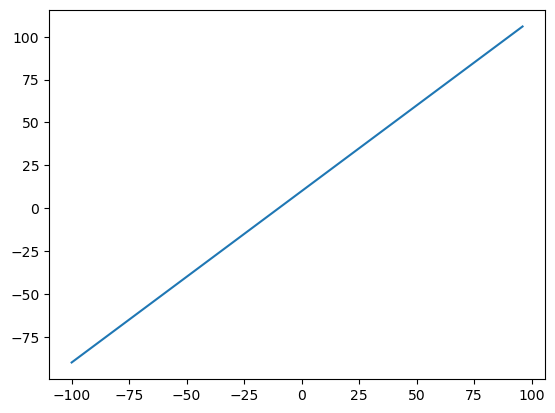

In [42]:
# Visualize the data
import matplotlib.pyplot as plt

plt.plot(X, y)

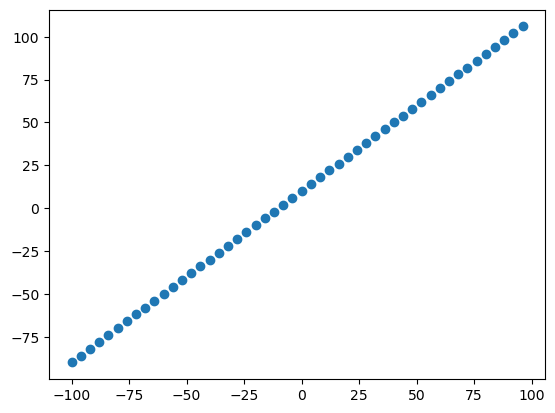

In [43]:
plt.scatter(X, y)

### The 3 sets...

* **Training set** - the model learns from this data, which is typically 70-80% of the total data you have available.
* **Validation set** - the model gets tuned on this data, which is typically 10-15% of the data available.
* **Test set** - the model gets evaluated on this data to test whatit has learned, this set is typically 10-15% of the total data available.

In [44]:
# Check the length of how many samples we have
len(X)

50

In [45]:
# Split the data into train and test sets

X_train = X[:40] # first 40 are training samples (80% of the data)
y_train = y[:40]

X_test = X[40:] # last 10 are testing samples (20% of the data)
y_test = y[40:]

len(X_train), len(X_test), len(y_train), len(y_test)

(40, 10, 40, 10)

### Visualizing the data

Now, we've got our data in training and test sets... let's visualize it again!

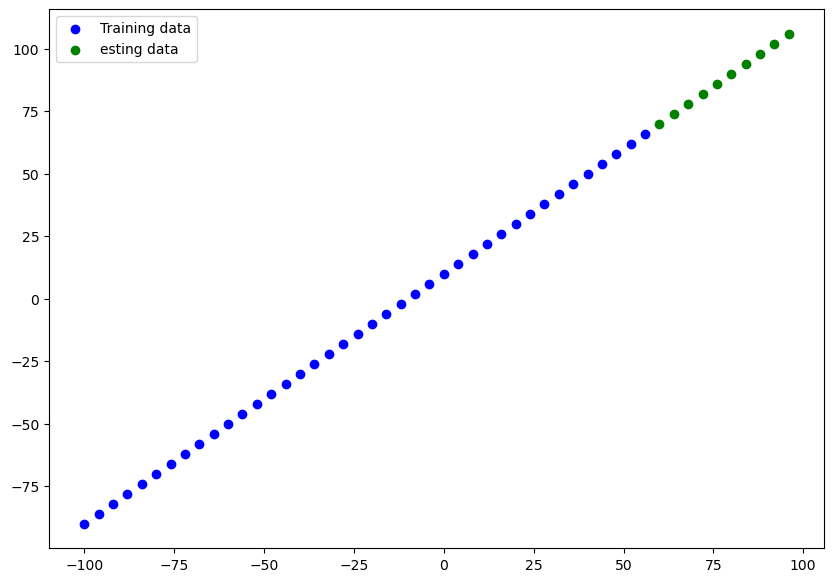

In [46]:
plt.figure(figsize=(10, 7))

# Plot training data in blue
plt.scatter(X_train, y_train, c="b", label = "Training data")

# Plot test data in green
plt.scatter(X_test, y_test, c = "g", label = "esting data")

# Show a legend
plt.legend();

In [47]:
# Let's have a look at how to build a neural network for our data

# 1. Create a model:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(1))

# 2. Compile the model
model.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.SGD(),
                metrics = ["mae"])

# # 3. Fit the model
# model.fit(tf.expand_dims(X_train, axis = -1), y_train, epochs = 100)

### Visualizing the model

In [48]:
model.summary()

ValueError: This model has not yet been built. Build the model first by calling `build()` or by calling the model on a batch of data.

In [49]:
model.build()

ValueError: You must provide an `input_shape` argument.

In [50]:
X.shape

TensorShape([50])

In [51]:
X[0].shape
# a scaler value - shape is 1 -> using 1 value to predict 1 value

TensorShape([])

In [52]:
# let's create a model which builds automatically by defininf the input shape argument in the first layer
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=[1])
])

model.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.SGD(),
                metrics = ["mae"])

In [53]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


* Total params - total number of parameters in the model.
* Trainable parameters - these are the parameters (patterns) the model can update as it trains.
* Non-trainable parameters - these parameters are not updated during training (this is typical when you bring in already learned patterns or parameters from other models during **transfer learning**)

**Resource:** Check out MIT's introduction to deep learning video.
**Exercise:** Try playing around with the number of hidden units in the dense layers, see how that affects the number of parameters (total and trainable) by calling `model.summary()`

In [54]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(4, input_shape=[1])
])

model.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.SGD(),
                metrics = ["mae"])

model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 4)                 8         
                                                                 
Total params: 8
Trainable params: 8
Non-trainable params: 0
_________________________________________________________________


In [55]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(20, input_shape=[1])
])

model.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.SGD(),
                metrics = ["mae"])

model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_13 (Dense)            (None, 20)                40        
                                                                 
Total params: 40
Trainable params: 40
Non-trainable params: 0
_________________________________________________________________


In [56]:
# Let's fit our model to the training data
model.fit(X_train, y_train, epochs=100, verbose = 0)

In [ ]:
# # Let's fit our model to the training data
# model.fit(X_train, y_train, epochs=100, verbose = 1)

### PART 4

In [57]:
# Get a summary of our model
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_13 (Dense)            (None, 20)                40        
                                                                 
Total params: 40
Trainable params: 40
Non-trainable params: 0
_________________________________________________________________


* 2 trainable parameters per hidden unit (weight and bias?)

In [58]:
from tensorflow.keras.utils import plot_model

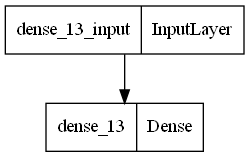

In [59]:
plot_model(model = model)

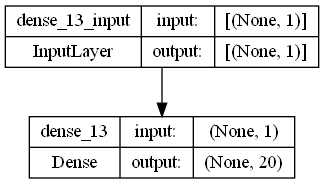

In [60]:
plot_model(model = model, show_shapes=True)

In [107]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(20, input_shape=[1], name = "input_layer"),
    tf.keras.layers.Dense(1, name="output_layer")
], name = "model1")

model.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.SGD(),
                metrics = ["mae"])

model.summary()

Model: "model1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 20)                40        
                                                                 
 output_layer (Dense)        (None, 1)                 21        
                                                                 
Total params: 61
Trainable params: 61
Non-trainable params: 0
_________________________________________________________________


In [108]:
# Let's fit our model to the training data
model.fit(X_train, y_train, epochs=100, verbose = 0)

In [109]:
model.summary()

Model: "model1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 20)                40        
                                                                 
 output_layer (Dense)        (None, 1)                 21        
                                                                 
Total params: 61
Trainable params: 61
Non-trainable params: 0
_________________________________________________________________


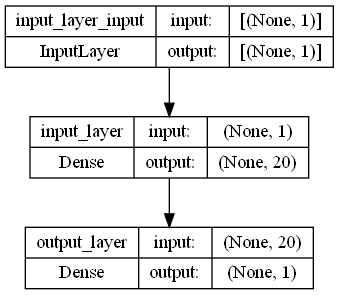

In [110]:
plot_model(model=model, show_shapes = True)

### Visualize our model's predictions

To visualize predictions, it's a good idea to plot them against the ground truth labels.

Often you'll see this in the form of `y_test` or `y_true` versus `y_pred` (ground truth versus your model's predictions).

In [111]:
# Make some predictions

y_pred = model.predict(X_test)
y_pred

1/1 [==============================] - 0s 125ms/step


array([[ 81.62675 ],
       [ 86.953545],
       [ 92.28036 ],
       [ 97.60716 ],
       [102.933975],
       [108.26078 ],
       [113.58759 ],
       [118.914406],
       [124.24121 ],
       [129.56802 ]], dtype=float32)

In [112]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106])>

In [113]:
# Let's create a plotting function

def plot_predictions(train_data = X_train, train_labels = y_train,
                    test_data = X_test, test_labels = y_test,
                    predictions = y_pred):
    """
    Plots training datam test data and compares predictions to ground truth labels.
    """
    
    plt.figure(figsize = (10, 7))
    
    # Plot training data in blue
    plt.scatter(train_data, train_labels, c = "b", label = "Training data")
    
    # Plot testing data in green
    plt.scatter(test_data, test_labels, c = "g", label = "Testing data")
    
    # Plot model's predictions in red
    plt.scatter(test_data, predictions, c = "r", label = "Predictions")
    
    #show the legend
    plt.legend();

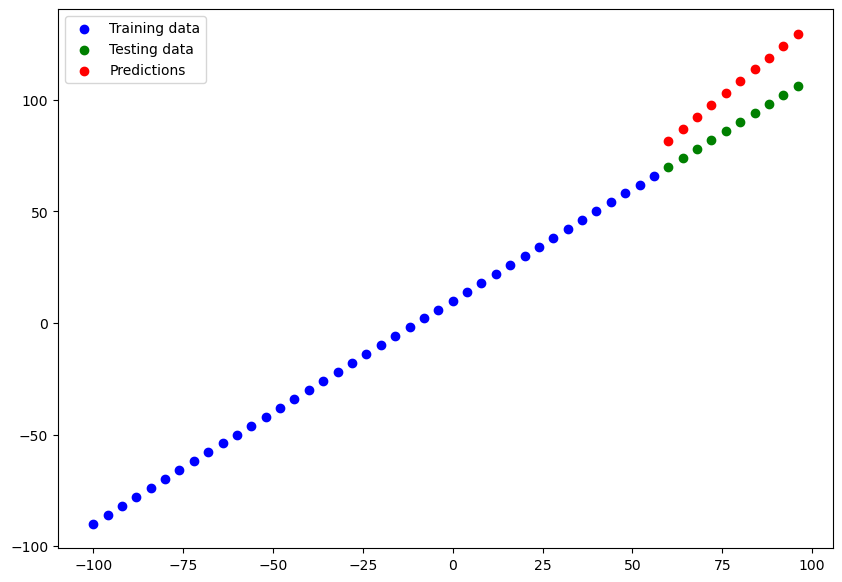

In [114]:
plot_predictions(train_data = X_train, train_labels=y_train,
                test_data = X_test, test_labels = y_test,
                predictions = y_pred)

### Evaluating our model's predictions with regression evaluation metrics

Depending on the problem you're working on, there will be different evaluation metrics to evaluate model's performanse.

Since we're working on a regression problem, two of the main metris:
* MAE - mean absolute error (on average, how wrong is each of my model's predictions)
* MSE - mean square error (square the average errors)

In [117]:
# Evaluate the model on the test set

model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 31ms/step - loss: 17.5974 - mae: 17.5974


[17.597381591796875, 17.597381591796875]

In [120]:
# Calculate the mean squared error

mae = tf.metrics.mean_absolute_error(y_true = y_test, y_pred = y_pred)
mae

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([10.949301, 10.      , 10.456072, 12.242865, 15.54718 , 20.26078 ,
       25.587593, 30.914404, 36.24121 , 41.568024], dtype=float32)>

In [121]:
y_pred = tf.constant(y_pred)

In [122]:
y_pred

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[ 81.62675 ],
       [ 86.953545],
       [ 92.28036 ],
       [ 97.60716 ],
       [102.933975],
       [108.26078 ],
       [113.58759 ],
       [118.914406],
       [124.24121 ],
       [129.56802 ]], dtype=float32)>

In [123]:

y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106])>

In [124]:
# Calculate the mean squared error

mae = tf.metrics.mean_absolute_error(y_true = y_test, y_pred = y_pred)
mae

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([10.949301, 10.      , 10.456072, 12.242865, 15.54718 , 20.26078 ,
       25.587593, 30.914404, 36.24121 , 41.568024], dtype=float32)>

- y_pred and y_test are still not in the same shape

In [126]:
y_pred = tf.squeeze(y_pred)

In [127]:
mae = tf.metrics.mean_absolute_error(y_true = y_test, y_pred = y_pred)
mae

<tf.Tensor: shape=(), dtype=float32, numpy=17.59738>